# XGBOOST

## REGRESSÃO

In [1]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model = xgb.XGBRegressor(n_estimators=7)
model.fit(X_train, y_train)

# Acessando as árvores ajustadas
booster = model.get_booster()

In [2]:
data.feature_names, len(data.feature_names)

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 8)

In [3]:
booster.save_model('model.json')

In [4]:
trees = booster.get_dump(with_stats=False)  # Inclui estatísticas adicionais
len(trees)

7

### 1.1 Exibir as árvores

In [5]:
# Exibindo as árvores
for i, tree in enumerate(trees):
    print(f"Tree {i}:")
    print(tree)
    print("\n" + "="*50 + "\n")


Tree 0:
0:[f0<5.07359982] yes=1,no=2,missing=2
	1:[f0<3.07139993] yes=3,no=4,missing=4
		3:[f2<4.31422901] yes=7,no=8,missing=8
			7:[f0<2.23280001] yes=15,no=16,missing=16
				15:[f2<3.44590163] yes=31,no=32,missing=32
					31:[f6<34.0499992] yes=63,no=64,missing=64
						63:leaf=-0.181092769
						64:leaf=-0.0386601463
					32:[f0<1.96200001] yes=65,no=66,missing=66
						65:leaf=-0.303022563
						66:leaf=-0.202527121
				16:[f5<2.0333333] yes=33,no=34,missing=34
					33:[f7<-118.260002] yes=67,no=68,missing=68
						67:leaf=0.233456627
						68:leaf=-0.0206921641
					34:[f7<-122.360001] yes=69,no=70,missing=70
						69:leaf=0.231359527
						70:leaf=-0.10567794
			8:[f0<2.36870003] yes=17,no=18,missing=18
				17:[f6<35.2900009] yes=35,no=36,missing=36
					35:[f7<-118.309998] yes=71,no=72,missing=72
						71:leaf=-0.114829727
						72:leaf=-0.298697025
					36:[f7<-119.849998] yes=73,no=74,missing=74
						73:leaf=-0.341981947
						74:leaf=-0.426706821
				18:[f5<2.29508185] yes=

In [6]:
print(trees[0])

0:[f0<5.07359982] yes=1,no=2,missing=2
	1:[f0<3.07139993] yes=3,no=4,missing=4
		3:[f2<4.31422901] yes=7,no=8,missing=8
			7:[f0<2.23280001] yes=15,no=16,missing=16
				15:[f2<3.44590163] yes=31,no=32,missing=32
					31:[f6<34.0499992] yes=63,no=64,missing=64
						63:leaf=-0.181092769
						64:leaf=-0.0386601463
					32:[f0<1.96200001] yes=65,no=66,missing=66
						65:leaf=-0.303022563
						66:leaf=-0.202527121
				16:[f5<2.0333333] yes=33,no=34,missing=34
					33:[f7<-118.260002] yes=67,no=68,missing=68
						67:leaf=0.233456627
						68:leaf=-0.0206921641
					34:[f7<-122.360001] yes=69,no=70,missing=70
						69:leaf=0.231359527
						70:leaf=-0.10567794
			8:[f0<2.36870003] yes=17,no=18,missing=18
				17:[f6<35.2900009] yes=35,no=36,missing=36
					35:[f7<-118.309998] yes=71,no=72,missing=72
						71:leaf=-0.114829727
						72:leaf=-0.298697025
					36:[f7<-119.849998] yes=73,no=74,missing=74
						73:leaf=-0.341981947
						74:leaf=-0.426706821
				18:[f5<2.29508185] yes=37,no=38

In [7]:
feature_names = data.feature_names

# exibe as árvores com nomes de features
trees = booster.get_dump(with_stats=True)

# f para substituir f0, f1... pelos nomes das features
def replace_feature_names(tree, feature_names):
    for i, feature in enumerate(feature_names):
        tree = tree.replace(f"f{i}", feature)
    return tree

for i, tree in enumerate(trees):
    print(f"Tree {i}:")
    print(replace_feature_names(tree, feature_names))
    print("\n" + "="*50 + "\n")
    break


Tree 0:
0:[MedInc<5.07359982] yes=1,no=2,missing=2,gain=6984.54297,cover=16512
	1:[MedInc<3.07139993] yes=3,no=4,missing=4,gain=1730.25586,cover=13059
		3:[AveRooms<4.31422901] yes=7,no=8,missing=8,gain=321.78833,cover=6250
			7:[MedInc<2.23280001] yes=15,no=16,missing=16,gain=184.532532,cover=2620
				15:[AveRooms<3.44590163] yes=31,no=32,missing=32,gain=111.646179,cover=1429
					31:[Latitude<34.0499992] yes=63,no=64,missing=64,gain=27.1892471,cover=509
						63:leaf=-0.181092769,cover=196
						64:leaf=-0.0386601463,cover=313
					32:[MedInc<1.96200001] yes=65,no=66,missing=66,gain=22.4318848,cover=920
						65:leaf=-0.303022563,cover=607
						66:leaf=-0.202527121,cover=313
				16:[AveOccup<2.0333333] yes=33,no=34,missing=34,gain=115.466148,cover=1191
					33:[Longitude<-118.260002] yes=67,no=68,missing=68,gain=35.7960968,cover=222
						67:leaf=0.233456627,cover=147
						68:leaf=-0.0206921641,cover=75
					34:[Longitude<-122.360001] yes=69,no=70,missing=70,gain=49.4704132,cover=9

In [8]:
booster.trees_to_dataframe()

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover,Category
0,0,0,0-0,f0,5.073600,0-1,0-2,0-2,6984.542970,16512.0,NaN
1,0,1,0-1,f0,3.071400,0-3,0-4,0-4,1730.255860,13059.0,NaN
2,0,2,0-2,f0,6.828000,0-5,0-6,0-6,1238.476070,3453.0,NaN
3,0,3,0-3,f2,4.314229,0-7,0-8,0-8,321.788330,6250.0,NaN
4,0,4,0-4,f5,2.343324,0-9,0-10,0-10,969.683960,6809.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
870,6,118,6-118,Leaf,NaN,NaN,NaN,NaN,0.050559,210.0,NaN
871,6,119,6-119,Leaf,NaN,NaN,NaN,NaN,0.223239,9.0,NaN
872,6,120,6-120,Leaf,NaN,NaN,NaN,NaN,0.113491,9.0,NaN
873,6,121,6-121,Leaf,NaN,NaN,NaN,NaN,0.155870,33.0,NaN


## CLASSIFICAÇÃO

In [9]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model = xgb.XGBClassifier(n_estimators=7, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')
model = xgb.XGBClassifier(n_estimators=7)
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=7, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### 1.1 Exibir plot das trees

<Axes: >

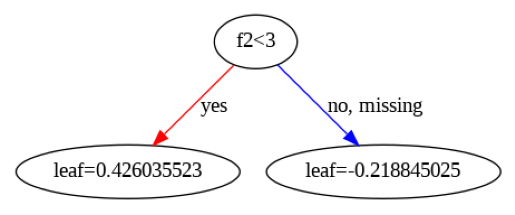

In [10]:
xgb.plot_tree(model, num_trees=0)

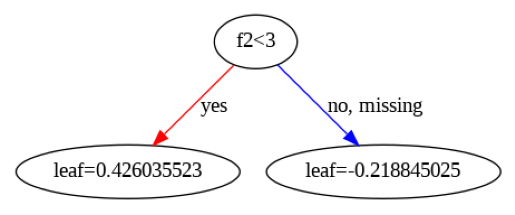

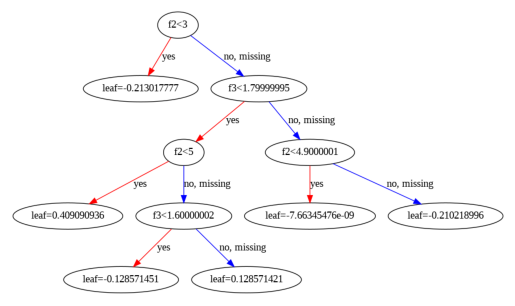

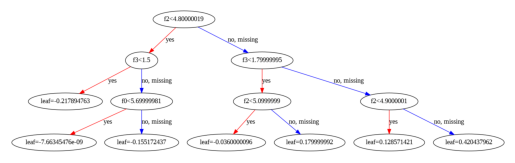

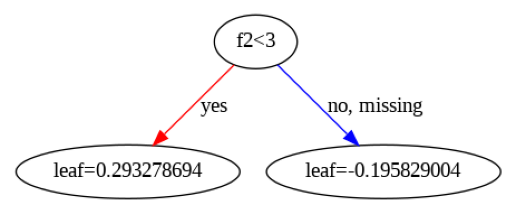

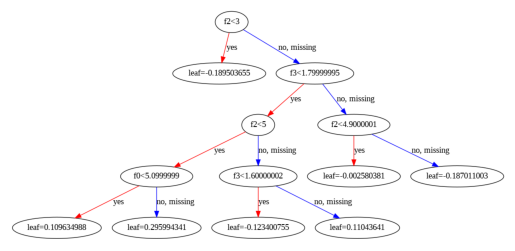

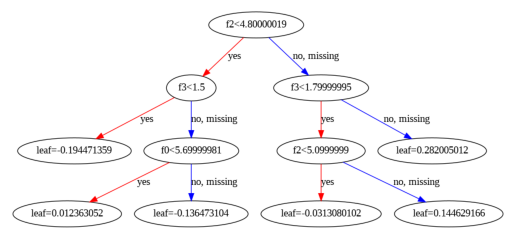

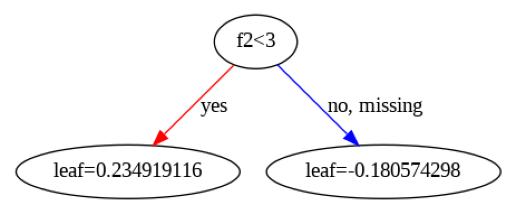

In [11]:
for i in range(len(trees)):
  xgb.plot_tree(model, num_trees=i)

### 1.2 Pegando dados das Árvores

In [12]:
# Acessando as árvores ajustadas
booster = model.get_booster()

# Obtendo as árvores em formato de texto
trees = booster.get_dump(with_stats=False)

In [13]:
"""
    ** get_dump(fmap='', with_stats=False, dump_format='text')
    Returns the model dump as a list of strings. Unlike save_model(), the output format is
    primarily used for visualization or interpretation, hence it’s more human readable but cannot
    be loaded back to XGBoost.

    Parameters:

            fmap (str | PathLike) – Name of the file containing feature map names.

            with_stats (bool) – Controls whether the split statistics are output.

            dump_format (str) – Format of model dump. Can be ‘text’, ‘json’ or ‘dot’.

    Return type:
        List[str]
"""


trees = booster.get_dump(with_stats=False, dump_format='json')
print(trees[0])

  { "nodeid": 0, "depth": 0, "split": "f2", "split_condition": 3, "yes": 1, "no": 2, "missing": 2 , "children": [
    { "nodeid": 1, "leaf": 0.426035523 }, 
    { "nodeid": 2, "leaf": -0.218845025 }
  ]}


In [14]:
trees = booster.get_dump(with_stats=False, dump_format='text')
print(trees[0])

0:[f2<3] yes=1,no=2,missing=2
	1:leaf=0.426035523
	2:leaf=-0.218845025



In [15]:
trees = booster.get_dump(with_stats=False)
print(trees[0])

0:[f2<3] yes=1,no=2,missing=2
	1:leaf=0.426035523
	2:leaf=-0.218845025



### 1.3 Quantidade de Árvores

In [16]:
print(trees)
print(len(trees))

print()
classes = model.classes_
print(classes, len(classes))

feature_names = data.feature_names
print(feature_names, len(feature_names))

print()
print('Quantidade de Árvores: ', len(classes) * len(trees)/(len(classes)))

['0:[f2<3] yes=1,no=2,missing=2\n\t1:leaf=0.426035523\n\t2:leaf=-0.218845025\n', '0:[f2<3] yes=1,no=2,missing=2\n\t1:leaf=-0.213017777\n\t2:[f3<1.79999995] yes=3,no=4,missing=4\n\t\t3:[f2<5] yes=5,no=6,missing=6\n\t\t\t5:leaf=0.409090936\n\t\t\t6:[f3<1.60000002] yes=9,no=10,missing=10\n\t\t\t\t9:leaf=-0.128571451\n\t\t\t\t10:leaf=0.128571421\n\t\t4:[f2<4.9000001] yes=7,no=8,missing=8\n\t\t\t7:leaf=-7.66345476e-09\n\t\t\t8:leaf=-0.210218996\n', '0:[f2<4.80000019] yes=1,no=2,missing=2\n\t1:[f3<1.5] yes=3,no=4,missing=4\n\t\t3:leaf=-0.217894763\n\t\t4:[f0<5.69999981] yes=7,no=8,missing=8\n\t\t\t7:leaf=-7.66345476e-09\n\t\t\t8:leaf=-0.155172437\n\t2:[f3<1.79999995] yes=5,no=6,missing=6\n\t\t5:[f2<5.0999999] yes=9,no=10,missing=10\n\t\t\t9:leaf=-0.0360000096\n\t\t\t10:leaf=0.179999992\n\t\t6:[f2<4.9000001] yes=11,no=12,missing=12\n\t\t\t11:leaf=0.128571421\n\t\t\t12:leaf=0.420437962\n', '0:[f2<3] yes=1,no=2,missing=2\n\t1:leaf=0.293278694\n\t2:leaf=-0.195829004\n', '0:[f2<3] yes=1,no=2,miss

### 1.4 Exibindo árvores

In [17]:
# Exibindo as árvores com os índices das features
for i, tree in enumerate(trees):
    print(f"Tree {i}:")
    print(tree)
    print("\n" + "="*50 + "\n")



Tree 0:
0:[f2<3] yes=1,no=2,missing=2
	1:leaf=0.426035523
	2:leaf=-0.218845025



Tree 1:
0:[f2<3] yes=1,no=2,missing=2
	1:leaf=-0.213017777
	2:[f3<1.79999995] yes=3,no=4,missing=4
		3:[f2<5] yes=5,no=6,missing=6
			5:leaf=0.409090936
			6:[f3<1.60000002] yes=9,no=10,missing=10
				9:leaf=-0.128571451
				10:leaf=0.128571421
		4:[f2<4.9000001] yes=7,no=8,missing=8
			7:leaf=-7.66345476e-09
			8:leaf=-0.210218996



Tree 2:
0:[f2<4.80000019] yes=1,no=2,missing=2
	1:[f3<1.5] yes=3,no=4,missing=4
		3:leaf=-0.217894763
		4:[f0<5.69999981] yes=7,no=8,missing=8
			7:leaf=-7.66345476e-09
			8:leaf=-0.155172437
	2:[f3<1.79999995] yes=5,no=6,missing=6
		5:[f2<5.0999999] yes=9,no=10,missing=10
			9:leaf=-0.0360000096
			10:leaf=0.179999992
		6:[f2<4.9000001] yes=11,no=12,missing=12
			11:leaf=0.128571421
			12:leaf=0.420437962



Tree 3:
0:[f2<3] yes=1,no=2,missing=2
	1:leaf=0.293278694
	2:leaf=-0.195829004



Tree 4:
0:[f2<3] yes=1,no=2,missing=2
	1:leaf=-0.189503655
	2:[f3<1.79999995] yes=3,no

In [18]:
# Exibindo as árvores com os nomes das features (igual ao que fizemos na regressão)
feature_names = data.feature_names  # Nomes das features do dataset Iris


def replace_feature_names(tree, feature_names):
    for i, feature in enumerate(feature_names):
        tree = tree.replace(f"f{i}", feature)
    return tree

for i, tree in enumerate(trees):
    print(f"Tree {i}:")
    print(replace_feature_names(tree, feature_names))
    print("\n" + "="*50 + "\n")

Tree 0:
0:[petal length (cm)<3] yes=1,no=2,missing=2
	1:leaf=0.426035523
	2:leaf=-0.218845025



Tree 1:
0:[petal length (cm)<3] yes=1,no=2,missing=2
	1:leaf=-0.213017777
	2:[petal width (cm)<1.79999995] yes=3,no=4,missing=4
		3:[petal length (cm)<5] yes=5,no=6,missing=6
			5:leaf=0.409090936
			6:[petal width (cm)<1.60000002] yes=9,no=10,missing=10
				9:leaf=-0.128571451
				10:leaf=0.128571421
		4:[petal length (cm)<4.9000001] yes=7,no=8,missing=8
			7:leaf=-7.66345476e-09
			8:leaf=-0.210218996



Tree 2:
0:[petal length (cm)<4.80000019] yes=1,no=2,missing=2
	1:[petal width (cm)<1.5] yes=3,no=4,missing=4
		3:leaf=-0.217894763
		4:[sepal length (cm)<5.69999981] yes=7,no=8,missing=8
			7:leaf=-7.66345476e-09
			8:leaf=-0.155172437
	2:[petal width (cm)<1.79999995] yes=5,no=6,missing=6
		5:[petal length (cm)<5.0999999] yes=9,no=10,missing=10
			9:leaf=-0.0360000096
			10:leaf=0.179999992
		6:[petal length (cm)<4.9000001] yes=11,no=12,missing=12
			11:leaf=0.128571421
			12:leaf=0.42043

### 1.5 mY method

In [19]:
import re

def parse_tree(tree_str):
    tree = []
    lines = tree_str.split('\n')  # Dividindo a árvore linha por linha

    for line in lines:
        # Removendo indentação e espaços
        line = line.strip()

        # Verificando se é um nó ou uma folha
        if 'leaf' in line:
            # Extraindo o número do nó e o valor da folha
            node_num = re.search(r'(\d+):leaf=([-\d.]+)', line)
            if node_num:
                tree.append({'node': int(node_num.group(1)), 'leaf': float(node_num.group(2))})
        else:
            # Extraindo informações de nós
            node_info = re.search(r'(\d+):\[f(\d+)<([-\d.]+)\] yes=(\d+),no=(\d+),missing=(\d+)', line)
            if node_info:
                tree.append({
                    'node': int(node_info.group(1)),
                    'feature': int(node_info.group(2)),
                    'threshold': float(node_info.group(3)),
                    'yes': int(node_info.group(4)),
                    'no': int(node_info.group(5)),
                    'missing': int(node_info.group(6))
                })
    return tree

# Exemplo de uso
i = 1
tree_0 = trees[i]
parsed_tree = parse_tree(tree_0)
print("Fomated ", parsed_tree)
print("Orig ", trees[i])


Fomated  [{'node': 0, 'feature': 2, 'threshold': 3.0, 'yes': 1, 'no': 2, 'missing': 2}, {'node': 1, 'leaf': -0.213017777}, {'node': 2, 'feature': 3, 'threshold': 1.79999995, 'yes': 3, 'no': 4, 'missing': 4}, {'node': 3, 'feature': 2, 'threshold': 5.0, 'yes': 5, 'no': 6, 'missing': 6}, {'node': 5, 'leaf': 0.409090936}, {'node': 6, 'feature': 3, 'threshold': 1.60000002, 'yes': 9, 'no': 10, 'missing': 10}, {'node': 9, 'leaf': -0.128571451}, {'node': 10, 'leaf': 0.128571421}, {'node': 4, 'feature': 2, 'threshold': 4.9000001, 'yes': 7, 'no': 8, 'missing': 8}, {'node': 7, 'leaf': -7.66345476}, {'node': 8, 'leaf': -0.210218996}]
Orig  0:[f2<3] yes=1,no=2,missing=2
	1:leaf=-0.213017777
	2:[f3<1.79999995] yes=3,no=4,missing=4
		3:[f2<5] yes=5,no=6,missing=6
			5:leaf=0.409090936
			6:[f3<1.60000002] yes=9,no=10,missing=10
				9:leaf=-0.128571451
				10:leaf=0.128571421
		4:[f2<4.9000001] yes=7,no=8,missing=8
			7:leaf=-7.66345476e-09
			8:leaf=-0.210218996



# SKLEARN

In [20]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.913

### 1.1 Mostrando estimators_

In [21]:
print(clf.estimators_)

[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                        random_state=RandomState(MT19937) at 0x7BDBBF345A40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                        random_state=RandomState(MT19937) at 0x7BDBBF345A40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                        random_state=RandomState(MT19937) at 0x7BDBBF345A40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                        random_state=RandomState(MT19937) at 0x7BDBBF345A40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                        random_state=RandomState(MT19937) at 0x7BDBBF345A40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                        random_state=RandomState(MT19937) at 0x7BDBBF345A40)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                        random_state=RandomState(MT19937) at 0x7BDBBF345A40)]
 [DecisionTre

In [22]:
from sklearn.tree import export_text

for i, tree in enumerate(clf.estimators_):
    print(f"Tree {i}")
    tree_model = tree[0]
    tree_rules = export_text(tree_model)
    print(tree_rules)


Tree 0
|--- feature_1 <= 1.12
|   |--- value: [-0.15]
|--- feature_1 >  1.12
|   |--- value: [0.94]

Tree 1
|--- feature_1 <= -1.37
|   |--- value: [1.28]
|--- feature_1 >  -1.37
|   |--- value: [-0.11]

Tree 2
|--- feature_5 <= 1.72
|   |--- value: [-0.08]
|--- feature_5 >  1.72
|   |--- value: [1.79]

Tree 3
|--- feature_5 <= -1.36
|   |--- value: [1.22]
|--- feature_5 >  -1.36
|   |--- value: [-0.10]

Tree 4
|--- feature_7 <= 1.23
|   |--- value: [-0.12]
|--- feature_7 >  1.23
|   |--- value: [1.13]

Tree 5
|--- feature_2 <= 1.67
|   |--- value: [-0.08]
|--- feature_2 >  1.67
|   |--- value: [1.86]

Tree 6
|--- feature_2 <= -1.20
|   |--- value: [1.06]
|--- feature_2 >  -1.20
|   |--- value: [-0.14]

Tree 7
|--- feature_7 <= -1.49
|   |--- value: [1.42]
|--- feature_7 >  -1.49
|   |--- value: [-0.10]

Tree 8
|--- feature_4 <= -1.57
|   |--- value: [1.55]
|--- feature_4 >  -1.57
|   |--- value: [-0.09]

Tree 9
|--- feature_8 <= 1.35
|   |--- value: [-0.12]
|--- feature_8 >  1.35
|   